# Transportation Analysis 
In this project, I’m exploring transportation data from the Bureau of Transportation Statistics (BTS) to find insights about how people and goods move across the U.S., and where improvements can be made in safety, efficiency, and environmental impact.

Because the dataset is quite large, I’ll be analyzing it year by year and comparing the results across different years. To start, I’m focusing on the data for 2020, digging into that year’s trends and patterns before moving on to others.

This approach helps keep the analysis manageable and lets us clearly see how transportation dynamics change over time.

In [1]:
import os
import pandas as pd
import gc

In [2]:
os.makedirs("cleaned", exist_ok=True)

In [3]:
main_folder = "2020 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2020 = pd.concat(all_data, ignore_index=True)


C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2553800348.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2553800348.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\App

In [4]:
Data_2020.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN


## Data Understanding & Preprocessing

### 1. Data Overview
- Brief description of the dataset (source, purpose, size, number of features, and observations)
- Types of variables (numerical, categorical, datetime, etc.)
- Initial observations about the data (e.g., imbalance, missing data, outliers)

### 2. Data Quality Checks
- Check for missing values and filling or dropping them. 
- dropping columns.
- checking for unique values

In [5]:
Data_2020.shape

(6104767, 15)

In [6]:
Data_2020.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.725568
DEPE               0.625567
CANPROV            0.476271
DF                 0.338619
COMMODITY2         0.228308
USASTATE           0.146125
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [7]:
Data_2020_1 = Data_2020.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [8]:
Data_2020_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,5,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,1,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,3,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,3,1220,29848,69,538,2.0,X,4,2020,NaN


In [9]:
Data_2020_1.isnull().mean().sort_values(ascending=False)

DF                 0.338619
COMMODITY2         0.228308
USASTATE           0.146125
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [10]:
Data_2020_1["DF"] = Data_2020_1["DF"].fillna(method="ffill")


C:\Users\Law\AppData\Local\Temp\ipykernel_1688\4269140452.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2020_1["DF"] = Data_2020_1["DF"].fillna(method="ffill")


In [11]:
Data_2020_cleaned = Data_2020_1.dropna()

In [12]:
Data_2020_cleaned.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
128479,1,AK,5,2010,22370,0,0,1.0,0,4,2020,2.0
128480,1,AK,1,1220,108133,24698,1482,1.0,X,4,2020,3.0
128481,1,AK,1,1220,809104,99790,15864,1.0,X,4,2020,3.0
128482,1,AK,5,1220,887888,0,17546,1.0,X,4,2020,3.0
128483,1,AK,5,1220,76006,0,1665,1.0,X,4,2020,3.0


### Cleaning `CONTCODE` Column

The `CONTCODE` column is expected to contain only valid container indicators, typically `'0'` (no container) and `'X'` (container used). However, some rows contain `'1'`, which is invalid or inconsistent with the expected format.  
To ensure data quality and consistency, rows where `CONTCODE == '1'` are removed.

This step helps prevent inaccurate analysis of container usage patterns by transportation mode.

In [13]:
Data_2020_cleaned["CONTCODE"] = Data_2020_cleaned["CONTCODE"].astype(str)

Data_2020_cleaned = Data_2020_cleaned[Data_2020_cleaned["CONTCODE"] != '1']

print(Data_2020_cleaned["CONTCODE"].unique())


C:\Users\Law\AppData\Local\Temp\ipykernel_1688\3597603431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2020_cleaned["CONTCODE"] = Data_2020_cleaned["CONTCODE"].astype(str)


['0' 'X']


In [14]:
Data_2020_cleaned.shape

(3582093, 12)

In [15]:
Data_2020_cleaned.isnull().sum().sum()

0

In [16]:
Data_2020_cleaned["CONTCODE"] = Data_2020_cleaned["CONTCODE"].astype("string")
Data_2020_cleaned.to_parquet("cleaned/2020.parquet", engine = "pyarrow", compression = "snappy")
del Data_2020_cleaned; gc.collect()

0

In [17]:
main_folder = "2021 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2021 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2280614508.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\

In [18]:
Data_2021.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XO,1220,13504,47,401,1.0,X,4.0,2021,NaN
1,1,AK,18XX,1,XX,NaN,2010,6668,425,0,1.0,1,4.0,2021,NaN
2,1,AK,20XX,3,NaN,XA,1220,5108,584,80,1.0,X,4.0,2021,NaN
3,1,AK,20XX,3,NaN,XC,1220,24397,800,1002,1.0,X,4.0,2021,NaN
4,1,AK,20XX,3,NaN,XC,1220,18429,101,80,2.0,X,4.0,2021,NaN


In [19]:
Data_2021.shape

(10982798, 15)

In [20]:
Data_2021.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.719968
DEPE               0.627705
CANPROV            0.480113
DF                 0.336806
COMMODITY2         0.227933
USASTATE           0.144362
MONTH              0.022289
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
YEAR               0.000000
dtype: float64

In [21]:
Data_2021_1 = Data_2021.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [22]:
Data_2021_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,3,1220,13504,47,401,1.0,X,4.0,2021,NaN
1,1,AK,1,2010,6668,425,0,1.0,1,4.0,2021,NaN
2,1,AK,3,1220,5108,584,80,1.0,X,4.0,2021,NaN
3,1,AK,3,1220,24397,800,1002,1.0,X,4.0,2021,NaN
4,1,AK,3,1220,18429,101,80,2.0,X,4.0,2021,NaN


In [23]:
Data_2021_1.shape

(10982798, 12)

In [24]:
Data_2021_1["DF"] = Data_2021_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\3661673831.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2021_1["DF"] = Data_2021_1["DF"].fillna(method="ffill")


In [25]:
Data_2021_cleaned = Data_2021_1.dropna()

In [26]:
Data_2021_cleaned["CONTCODE"] = Data_2021_cleaned["CONTCODE"].astype(str)

Data_2021_cleaned = Data_2021_cleaned[Data_2021_cleaned["CONTCODE"] != '1']

print(Data_2021_cleaned["CONTCODE"].unique())

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1557464421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2021_cleaned["CONTCODE"] = Data_2021_cleaned["CONTCODE"].astype(str)


['0' 'X']


In [27]:
Data_2021_cleaned.shape

(6304564, 12)

In [28]:
Data_2021_cleaned.isnull().sum()

TRDTYPE            0
USASTATE           0
DISAGMOT           0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

In [29]:
Data_2021_cleaned["CONTCODE"] = Data_2021_cleaned["CONTCODE"].astype("string")
Data_2021_cleaned.to_parquet("cleaned/2021.parquet", engine = "pyarrow", compression = "snappy")
del Data_2021_cleaned; gc.collect()

0

In [30]:
main_folder = "2022 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2022 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\921325311.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\921325311.py:11: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppDat

In [31]:
Data_2022.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,09XX,3,NaN,XC,1220,7091,36,644,1.0,X,4.0,2022.0,NaN
1,1,AK,19XX,1,XX,NaN,2010,39775,33470,0,1.0,0,4.0,2022.0,NaN
2,1,AK,20XX,3,NaN,XA,1220,11775,425,438,1.0,X,4.0,2022.0,NaN
3,1,AK,20XX,3,NaN,XA,1220,11103,17,37,2.0,X,4.0,2022.0,NaN
4,1,AK,20XX,3,NaN,XC,1220,45731,550,3548,1.0,X,4.0,2022.0,NaN


In [32]:
Data_2022.shape

(11275950, 15)

In [33]:
Data_2022.isnull().mean().sort_values(ascending=False)

MEXSTATE           7.233022e-01
DEPE               6.271934e-01
CANPROV            4.752699e-01
DF                 3.354754e-01
COMMODITY2         2.301897e-01
USASTATE           1.426170e-01
MONTH              2.233657e-02
YEAR               8.868432e-08
TRDTYPE            0.000000e+00
DISAGMOT           0.000000e+00
COUNTRY            0.000000e+00
VALUE              0.000000e+00
SHIPWT             0.000000e+00
FREIGHT_CHARGES    0.000000e+00
CONTCODE           0.000000e+00
dtype: float64

In [34]:
Data_2022_1 = Data_2022.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [35]:
Data_2022_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,3,1220,7091,36,644,1.0,X,4.0,2022.0,NaN
1,1,AK,1,2010,39775,33470,0,1.0,0,4.0,2022.0,NaN
2,1,AK,3,1220,11775,425,438,1.0,X,4.0,2022.0,NaN
3,1,AK,3,1220,11103,17,37,2.0,X,4.0,2022.0,NaN
4,1,AK,3,1220,45731,550,3548,1.0,X,4.0,2022.0,NaN


In [36]:
Data_2022_1.shape

(11275950, 12)

In [37]:
Data_2022_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2423709285.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2022_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")


In [38]:
Data_2022_cleaned = Data_2022_1.dropna()

In [39]:
Data_2022_cleaned["CONTCODE"] = Data_2022_cleaned["CONTCODE"].astype(str)

Data_2022_cleaned = Data_2022_cleaned[Data_2022_cleaned["CONTCODE"] != '1']

print(Data_2022_cleaned["CONTCODE"].unique())

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1017200992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2022_cleaned["CONTCODE"] = Data_2022_cleaned["CONTCODE"].astype(str)


['0' 'X']


In [40]:
Data_2022_cleaned.shape

(6482838, 12)

In [41]:
Data_2022_cleaned["CONTCODE"] = Data_2022_cleaned["CONTCODE"].astype("string")
Data_2022_cleaned.to_parquet("cleaned/2022.parquet", engine = "pyarrow", compression = "snappy")
del Data_2022_cleaned; gc.collect()

0

In [42]:
main_folder = "2023 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2023 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\536437812.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppDa

In [43]:
Data_2023.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0708,5,NaN,XQ,1220,21046,0,412,2.0,X,4,2023,NaN
1,1,AK,07XX,3,NaN,XO,1220,185454,310,3337,1.0,X,4,2023,NaN
2,1,AK,09XX,3,NaN,XQ,1220,21660,51,226,1.0,X,4,2023,NaN
3,1,AK,2006,3,NaN,XQ,1220,5053,5,99,2.0,X,4,2023,NaN
4,1,AK,20XX,3,NaN,XA,1220,51328,675,1271,1.0,X,4,2023,NaN


In [44]:
Data_2023.shape

(5919169, 15)

In [45]:
Data_2023.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.716462
DEPE               0.628549
CANPROV            0.480501
DF                 0.333755
COMMODITY2         0.229952
USASTATE           0.141499
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [46]:
Data_2023_1 = Data_2023.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [47]:
Data_2023_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,21046,0,412,2.0,X,4,2023,NaN
1,1,AK,3,1220,185454,310,3337,1.0,X,4,2023,NaN
2,1,AK,3,1220,21660,51,226,1.0,X,4,2023,NaN
3,1,AK,3,1220,5053,5,99,2.0,X,4,2023,NaN
4,1,AK,3,1220,51328,675,1271,1.0,X,4,2023,NaN


In [48]:
Data_2023_1.shape

(5919169, 12)

In [49]:
Data_2023_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\3825460211.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2023_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")


In [50]:
Data_2023_cleaned = Data_2023_1.dropna()

In [51]:
Data_2023_cleaned["CONTCODE"] = Data_2023_cleaned["CONTCODE"].astype(str)

Data_2023_cleaned = Data_2023_cleaned[Data_2023_cleaned["CONTCODE"] != '1']

print(Data_2023_cleaned["CONTCODE"].unique())

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2863384135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2023_cleaned["CONTCODE"] = Data_2023_cleaned["CONTCODE"].astype(str)


['0' 'X']


In [52]:
Data_2023_cleaned.shape

(3488872, 12)

In [53]:
Data_2023_cleaned["CONTCODE"] = Data_2023_cleaned["CONTCODE"].astype("string")
Data_2023_cleaned.to_parquet("cleaned/2023.parquet", engine = "pyarrow", compression = "snappy")
del Data_2023_cleaned; gc.collect()

0

In [54]:
main_folder = "2024 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2024 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\L

In [55]:
Data_2024.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0712,5,NaN,XQ,1220,14609,0,286,1.0,X,4,2024,NaN
1,1,AK,0901,5,NaN,XY,1220,26482,0,26,1.0,X,4,2024,NaN
2,1,AK,19XX,1,XX,NaN,2010,72786,40210,0,1.0,0,4,2024,NaN
3,1,AK,20XX,3,NaN,XA,1220,111914,775,980,1.0,X,4,2024,NaN
4,1,AK,20XX,3,NaN,XA,1220,24831,63,178,2.0,X,4,2024,NaN


In [56]:
Data_2024.shape

(1108543, 15)

In [57]:
Data_2024.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.702730
DEPE               0.639076
CANPROV            0.478648
DF                 0.328630
COMMODITY2         0.235537
USASTATE           0.125387
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [58]:
Data_2024_1 = Data_2024.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [59]:
Data_2024_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,14609,0,286,1.0,X,4,2024,NaN
1,1,AK,5,1220,26482,0,26,1.0,X,4,2024,NaN
2,1,AK,1,2010,72786,40210,0,1.0,0,4,2024,NaN
3,1,AK,3,1220,111914,775,980,1.0,X,4,2024,NaN
4,1,AK,3,1220,24831,63,178,2.0,X,4,2024,NaN


In [60]:
Data_2024_1.shape

(1108543, 12)

In [61]:
Data_2024_1["DF"] = Data_2024_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\1614991751.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2024_1["DF"] = Data_2024_1["DF"].fillna(method="ffill")


In [62]:
Data_2024_cleaned = Data_2024_1.dropna()

In [63]:
Data_2024_cleaned["CONTCODE"] = Data_2024_cleaned["CONTCODE"].astype(str)

Data_2024_cleaned = Data_2024_cleaned[Data_2024_cleaned["CONTCODE"] != '1']

print(Data_2024_cleaned["CONTCODE"].unique())

C:\Users\Law\AppData\Local\Temp\ipykernel_1688\2303071417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2024_cleaned["CONTCODE"] = Data_2024_cleaned["CONTCODE"].astype(str)


['0' 'X']


In [64]:
Data_2024_cleaned.shape

(663634, 12)

In [65]:
Data_2024_cleaned["CONTCODE"] = Data_2024_cleaned["CONTCODE"].astype("string")
Data_2024_cleaned.to_parquet("cleaned/2024.parquet", engine="pyarrow", compression="snappy")
del Data_2024_cleaned; gc.collect()

0

## Combining All My Yearly Datasets
To make the analysis easier and more insightful, I decided to combine all my individual yearly datasets into one master dataset. Instead of working with separate files for each year, this approach let me look at trends over time and run comparisons without jumping between files.

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go

In [67]:
D_Data = dd.read_parquet("cleaned/*.parquet", engine="pyarrow", gather_statistics=False)

In [68]:
Final_Data = D_Data.repartition(npartitions = 30)


### Data Visualization, Analysis, and Answering Key Questions

1. Which modes of transportation (DISAGMOT) accounted for the highest total shipping weight (SHIPWT) and value (VALUE) from 2020 to 2024?

2. How did trade volume (by VALUE and SHIPWT) vary seasonally across different months (MONTH) and years (YEAR) from 2020 to 2024?

3. Which U.S. states (USASTATE) and countries (COUNTRY) contributed most to the volume and value of trade from 2020 to 2024?

4. What was the distribution of trade types (TRDTYPE) across domestic and foreign shipments (DF) from 2020 to 2024?

5. How did container type (CONTCODE) usage vary by mode of transportation (DISAGMOT) from 2020 to 2024?

6. Were there any trends or changes in trade volume and value by year (YEAR) across different transportation modes (DISAGMOT) from 2020 to 2024?

7. Was there a correlation between shipping weight (SHIPWT), trade value (VALUE), and freight charges (FREIGHT_CHARGES) for different transportation modes (DISAGMOT) from 2020 to 2024?


#### Answering the business Question. 
starting with question number 1.

In [69]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)]

In [70]:
yearly_summary = df_filtered.groupby(["YEAR", "DISAGMOT"])[["SHIPWT", "VALUE"]].sum().reset_index().compute()

In [71]:
top2_shipwt = yearly_summary.sort_values(["YEAR", "SHIPWT"], ascending=[True, False]).groupby("YEAR").head(2)

In [72]:
top2_value = yearly_summary.sort_values(["YEAR", "VALUE"], ascending=[True, False]).groupby("YEAR").head(2)

In [73]:
print("Top 2 Modes by Shipping Weight:")
print(top2_shipwt)

Top 2 Modes by Shipping Weight:
      YEAR  DISAGMOT         SHIPWT          VALUE
0   2020.0         1   826666462157   292192694995
2   2020.0         7   728462275796   245897897872
3   2021.0         1  1353793662955   632693520790
6   2021.0         7  1284822258084   691336172945
7   2022.0         1  1424665965230   986657216967
10  2022.0         7  1357785192288  1121526551977
4   2023.0         1   739058827340   457440973355
11  2023.0         7   726865376618   452494764214
10  2024.0         7   139876704796    81807543575
7   2024.0         1   133167302623    84968608119


In [74]:
print("\nTop 2 Modes by Trade Value:")
print(top2_value)


Top 2 Modes by Trade Value:
      YEAR  DISAGMOT        SHIPWT          VALUE
0   2020.0         5  481554516706  2947919739618
1   2020.0         6  266097840537   543097875200
5   2021.0         5  874646204140  5986675183948
1   2021.0         6  434543790977  1157849918907
6   2022.0         5  899622720963  6914752297203
9   2022.0         6  451528244722  1317315285053
10  2023.0         5  450742572366  3894719315953
6   2023.0         6  235244385418   719225471171
8   2024.0         5   85536671254   770841436785
9   2024.0         6   42155110343   133731903683


In [119]:
fig_shipwt = px.bar(
    top2_shipwt,
    x = "DISAGMOT",
    y = "SHIPWT",
    color = "DISAGMOT",
    facet_col = "YEAR",
    title = "Top 2 Transportation Modes by Shipping Weight (2020–2024)",
    labels = {"DISAGMOT": "Mode of Transport", "SHIPWT": "Total Shipping Weight"},
    text_auto = ".2s",
     facet_col_spacing=0.08
)
fig_shipwt.update_layout(
    showlegend = False,
    height = 500, 
    width = 1000
)

fig_shipwt.for_each_annotation(lambda a: a.update(text = a.text.split("=")[-1])) 
fig_shipwt.show()

fig_value = px.bar(
    top2_value,
    x = "DISAGMOT",
    y = "VALUE",
    color = "DISAGMOT",
    facet_col = "YEAR",
    title = "Top 2 Transportation Modes by Trade Value (2020–2024)",
    labels = {"DISAGMOT": "Mode of Transport", "VALUE": "Total Trade Value"},
    text_auto = ".2s",
     facet_col_spacing=0.08
)
fig_value.update_layout(
    xaxis_tickangle = -45,
    height = 500,
    width = 1000
)
fig_value.for_each_annotation(lambda a: a.update(text = a.text.split("=")[-1]))
fig_value.show()


#### Conclusion 

- Rail and Truck transport modes consistently accounted for the highest total shipping weight and trade value over the 5 year period.

- These modes represent the backbone of freight movement, reflecting infrastructure and economic priorities.

### Answering Q2 

In [76]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)]

In [77]:
monthly_summary = df_filtered.groupby(["YEAR", "MONTH"])[["SHIPWT", "VALUE"]].sum().reset_index()
monthly_summary = monthly_summary.compute()


In [78]:
pivot_value = monthly_summary.pivot(index = "MONTH", columns = "YEAR", values = "VALUE")
pivot_shipwt = monthly_summary.pivot(index = "MONTH", columns = "YEAR", values = "SHIPWT")

In [79]:
month_order = list(range(1, 13))

fig = px.line(
    monthly_summary,
    x = "MONTH",
    y = "VALUE",
    color = "YEAR",
    title = "Seasonal Trade Value Trends (2020–2024)",
    markers = True,
    category_orders = {"MONTH": month_order}
)
fig.update_layout(xaxis_title = "Month", yaxis_title = "Trade Value")
fig.show()

fig2 = px.line(
    monthly_summary,
    x = "MONTH",
    y  = "SHIPWT",
    color = "YEAR",
    title = "Seasonal Shipping Weight Trends (2020–2024)",
    markers = True,
    category_orders = {"MONTH": month_order}
)
fig2.update_layout(xaxis_title = "Month", yaxis_title = "Shipping Weight")
fig2.show()


#### Conclusion 

- Trade volume and value were relatively high in month 1 (January) month but declined as the month progressed to month 12 (December)

- Patterns were consistent across years 2020 to 2024, indicating regular business cycles and seasonal demand fluctuations.

### Q3

In [143]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)]

In [144]:
usastate_group = df_filtered.groupby(["YEAR", "USASTATE"])[["SHIPWT", "VALUE"]].sum().reset_index()
grouped_countries  = df_filtered.groupby(["YEAR", "COUNTRY"])[["SHIPWT", "VALUE"]].sum().reset_index()

In [145]:
grouped_states  = usastate_group.compute()
grouped_countries = grouped_countries.compute()

In [146]:
grouped_countries["COUNTRY"] = grouped_countries["COUNTRY"].replace({1220: "Canada", 2010: "Mexico"})

In [147]:
top2_states_by_shipwt = grouped_states.sort_values(["YEAR", "SHIPWT"], ascending = [True, False]).groupby("YEAR").head(2)
top_countries_by_shipwt = (
    grouped_countries.sort_values(["YEAR", "SHIPWT"], ascending=[True, False])
    .groupby("YEAR")
    .head(2)
)

In [148]:
top2_states_by_value = grouped_states.sort_values(["YEAR", "VALUE"], ascending = [True, False]).groupby("YEAR").head(2)
top_countries_by_value = (
    grouped_countries.sort_values(["YEAR", "VALUE"], ascending=[True, False])
    .groupby("YEAR")
    .head(2)
)

In [129]:
fig_shipwt = px.bar(
    top2_states_by_shipwt,
    x = "YEAR",
    y = "SHIPWT",
    color = "USASTATE",
    barmode = "group",
    title = "Top 2 States by Shipping Weight (2020–2024)",
    text = "USASTATE"
)

fig_shipwt.update_layout(legend_title_text = "US State", height = 500)
fig_shipwt.show()

fig_value = px.bar(
    top2_states_by_value,
    x = "YEAR",
    y = "VALUE",
    color = "USASTATE",
    barmode = "group",
    title = "Top 2 States by Trade Value (2020–2024)",
    text = "USASTATE"
)
fig_value.update_layout(legend_title_text = "US State", height = 500)
fig_value.show()


In [149]:
fig1 = px.bar(
    top_countries_by_shipwt,
    x = "YEAR",
    y = "SHIPWT",
    color = "COUNTRY",
    barmode = "group",
    title = "Top 2 Countries by Shipping Weight (2020–2024)",
    labels={"SHIPWT": "Shipping Weight", "YEAR": "Year", "COUNTRY": "Country"},
    text = "COUNTRY"
)
fig1.update_layout(legend_title_text = "Country", height=500)
fig1.show()

fig2 = px.bar(
    top_countries_by_value,
    x = "YEAR",
    y = "VALUE",
    color = "COUNTRY",
    barmode = "group",
    title = "Top 2 Countries by Trade Value (2020–2024)",
    labels={"VALUE": "Trade Value", "YEAR": "Year", "COUNTRY": "Country"},
    text = "COUNTRY"
)
fig2.update_layout(legend_title_text = "Country", height = 500)
fig2.show()

#### Conclusion 

- Texas contributed most to trade volume and value from 2020 to 2022 and started declining after.

- Internationally, trade was almost exclusively with Canada and Mexico, reflecting strong land-border commerce ties.

### Q4

In [184]:
trdtype_df_summary = df_filtered.groupby(["YEAR", "DF", "TRDTYPE"]).size().reset_index()

In [185]:
trdtype_df_summary = trdtype_df_summary.compute()
trdtype_df_summary.columns = ["YEAR", "DF", "TRDTYPE", "COUNT"]

In [ ]:
trdtype_df_summary["TRDTYPE"] = trdtype_df_summary["TRDTYPE"].replace({1: "Export", 2: "Import"})

In [188]:
trdtype_df_summary["PERCENT"] = trdtype_df_summary.groupby(["YEAR", "TRDTYPE"])["COUNT"].transform(
    lambda x: x / x.sum() * 100
)

fig = px.bar(
    trdtype_df_summary,
    x="TRDTYPE",
    y="PERCENT",
    color="DF",
    barmode="stack",
    facet_col="YEAR",
    category_orders={"YEAR": sorted(trdtype_df_summary["YEAR"].unique())},
    title="Yearly Percentage Distribution of Trade Types by Domestic/Foreign (2020–2024)",
    labels={"TRDTYPE": "Trade Type", "PERCENT": "Percentage (%)", "DF": "Domestic - 1/Foreign - 2"},
    text_auto=".1f"
)

fig.update_layout(height=500, width=1200)
fig.show()


#### Conclusion 

- Trade types were well distributed between domestic and foreign shipments.

- Imports and exports showed distinct patterns across years, with domestic shipments dominating volume but foreign shipments accounting for significant trade value

- In the year 2022 foreign import was relatively high as compared to the other years.

Q5

In [91]:
container_mode_summary = df_filtered.groupby(["YEAR", "DISAGMOT", "CONTCODE"]).size().compute().reset_index()
container_mode_summary.columns = ["YEAR", "DISAGMOT", "CONTCODE", "COUNT"]

In [92]:
fig = px.bar(
    container_mode_summary,
    x="CONTCODE",
    y="COUNT",
    color="DISAGMOT",
    barmode="group",
    facet_col="YEAR",
    category_orders={"YEAR": sorted(container_mode_summary["YEAR"].unique())},
    title="Container Type Usage by Mode of Transportation (2020–2024)",
    labels={
        "CONTCODE": "Container Type",
        "COUNT": "Number of Shipments",
        "DISAGMOT": "Mode of Transportation",
    },
    height=500,
    width=1200
)

fig.update_layout(
    xaxis={'categoryorder':'category ascending'},
)
fig.show()


#### Conclusion  

- Truck and air mode of transport used a diverse range of container types.

- Truck transport showed concentrated use of specific container codes.

- There was a visibily differences in container usage from year 2022 to 2024

### Q6

In [95]:
yearly_mode_summary = df_filtered.groupby(["YEAR", "DISAGMOT"])[["SHIPWT", "VALUE"]].sum().compute().reset_index()

In [96]:
fig_weight = px.line(
    yearly_mode_summary,
    x="YEAR",
    y="SHIPWT",
    color="DISAGMOT",
    title="Yearly Trade Volume (Shipping Weight) by Transportation Mode (2020–2024)",
    markers=True,
    labels={"SHIPWT": "Total Shipping Weight", "YEAR": "Year", "DISAGMOT": "Transportation Mode"}
)
fig_weight.show()

fig_value = px.line(
    yearly_mode_summary,
    x="YEAR",
    y="VALUE",
    color="DISAGMOT",
    title="Yearly Trade Value by Transportation Mode (2020–2024)",
    markers=True,
    labels={"VALUE": "Total Trade Value", "YEAR": "Year", "DISAGMOT": "Transportation Mode"}
)
fig_value.show()


#### Conclusion 

- From 2020 to 2024, overall trade volume and value fluctuated, showing recovery after pandemic-related disruptions.

- Modes like rail and truck transport showed steady growth, while air freight experienced more volatility

In [97]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)][["DISAGMOT", "SHIPWT", "VALUE", "FREIGHT_CHARGES"]]
df_filtered = df_filtered.compute()

In [98]:
overall_corr = df_filtered[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()
print("Overall Correlation Matrix:")
print(overall_corr)

Overall Correlation Matrix:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.593019         0.859060
VALUE            0.593019  1.000000         0.574395
FREIGHT_CHARGES  0.859060  0.574395         1.000000


In [99]:
modes = df_filtered["DISAGMOT"].unique()

for mode in modes:
    mode_df = df_filtered[df_filtered["DISAGMOT"] == mode]
    corr = mode_df[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()
    print(f"\nCorrelation matrix for DISAGMOT = {mode}:")
    print(corr)


Correlation matrix for DISAGMOT = 5:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.350379         0.437852
VALUE            0.350379  1.000000         0.550063
FREIGHT_CHARGES  0.437852  0.550063         1.000000

Correlation matrix for DISAGMOT = 1:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.888558         0.535122
VALUE            0.888558  1.000000         0.432550
FREIGHT_CHARGES  0.535122  0.432550         1.000000

Correlation matrix for DISAGMOT = 8:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.029742         0.001325
VALUE            0.029742  1.000000         0.476337
FREIGHT_CHARGES  0.001325  0.476337         1.000000

Correlation matrix for DISAGMOT = 3:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.201745         0.423200
VALUE            0.201745  1.000000         0.383734
FREIGHT_CHARGES  0.423200  0.383734         1.000000


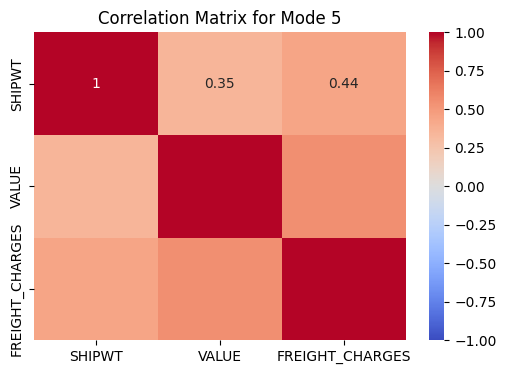

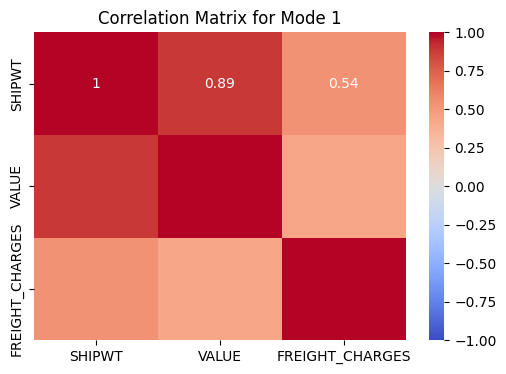

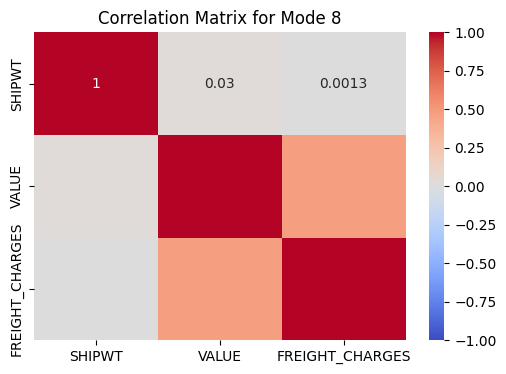

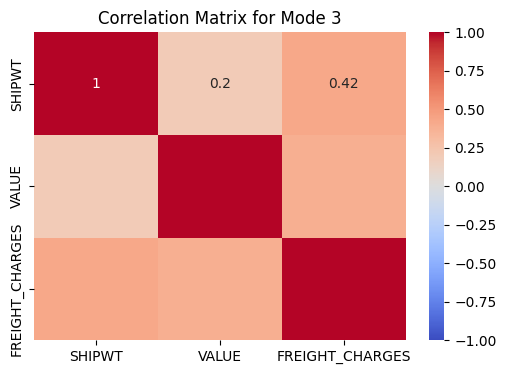

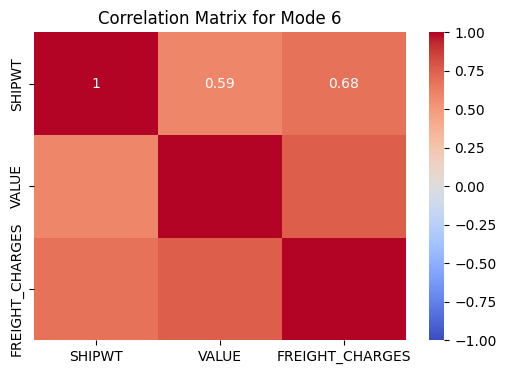

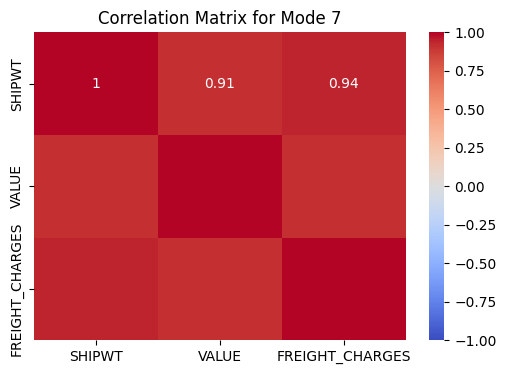

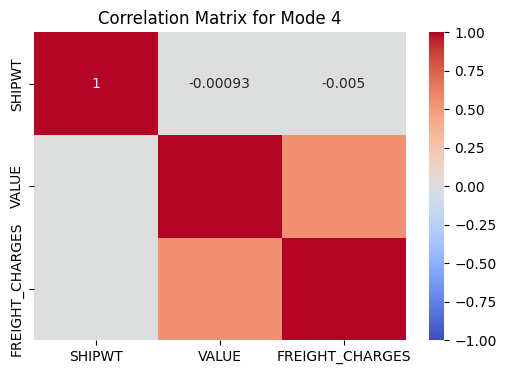

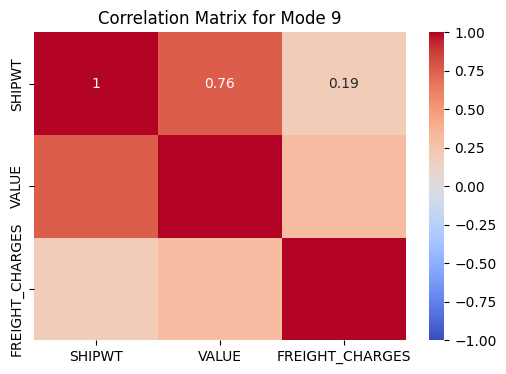

In [100]:
for mode in modes:
    mode_df = df_filtered[df_filtered["DISAGMOT"] == mode]
    corr = mode_df[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for Mode {mode}")
    plt.show()


#### Conclusion 

- There is a strong positive correlation between shipping weight and trade value across modes.

- Freight charges correlated positively but less strongly, reflecting pricing strategies and mode-specific cost factors.

- Correlation patterns varied by transportation mode, highlighting differences in cost structure and freight characteristics.